# Modeling: sentiment analysis

In [1]:
#install all the libreries we need for the logistic regression
#!pip install -r requirements.txt

In [2]:
#This is the process where we import all that we may need.

#General
import numpy as np
import pandas as pd
import pickle

#Graphics
import matplotlib.pyplot as plt
import seaborn as sns

#Model
import nltk
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# loading the csv file
df=pd.read_csv('/datasets/gdrive/DS4A - Team Project/data/all_data.csv')

# Logistic Regression 

In [4]:
#We import our Dataframe that will be use for fitting the model
low = pickle.load(open("variables/df.dat", "rb"))
low.head()

,TEXTO PQRSDF,TIPO DE PQRSDF
2722,BUSCA INFORMACION VACUNACION COVID PRIMERA VAC...,S
2723,SOLICITA AFILIACION PARA HIJA DE 8 MESES DE E...,S
2724,AFLIADO A COMPARTA BUSCA INFORMACION SOBRE ATE...,S
2725,BUSCA AGILIDAD PARA LA AUTORIZACION DE UN EXAM...,S
2726,BUSCA PORTABILIDAD DESDE EPS CAPITAL SALUD REG...,S


In [5]:
#We import our Parameters for transforming the text that will be used by the model
bow_counts = pickle.load(open("variables/bow_counts.dat", "rb"))
bow_counts

CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                tokenizer=<function word_tokenize at 0x7fa8c3e8bc20>)

In [6]:
# model with just one non-stratified train-test split

#Split the info and define the X & Y test and train
reviews_train, reviews_test = train_test_split(low, test_size=0.2, random_state=42) # add stratify=y
X_train_bow = bow_counts.fit_transform(reviews_train['TEXTO PQRSDF'])
X_test_bow = bow_counts.transform(reviews_test['TEXTO PQRSDF'])
y_train_bow = reviews_train['TIPO DE PQRSDF']
y_test_bow = reviews_test['TIPO DE PQRSDF']

#Define the model and fit it 
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_fitted = lr_model_all.fit(X_train_bow, y_train_bow)

# Predicting the output
test_pred_lr_prob = lr_fitted.predict_proba(X_test_bow)
test_pred_lr_all = lr_fitted.predict(X_test_bow)

#Accuracy of the model
print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all,average='micro'))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.6603053435114504
Accuracy:  66.03053435114504


In [7]:
# model with just one stratified train-test split

#Split the info and define the X & Y test and train
reviews_train_strat, reviews_test_strat = train_test_split(low, test_size=0.2, random_state=42, stratify=low['TIPO DE PQRSDF'])
X_train_bow_strat = bow_counts.fit_transform(reviews_train_strat['TEXTO PQRSDF'])
X_test_bow_strat = bow_counts.transform(reviews_test_strat['TEXTO PQRSDF'])
y_train_bow_strat = reviews_train_strat['TIPO DE PQRSDF']
y_test_bow_strat = reviews_test_strat['TIPO DE PQRSDF']

#Define the model and fit it 
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_fitted_strat = lr_model_all.fit(X_train_bow_strat, y_train_bow_strat)

# Predicting the output
test_pred_lr_prob_strat = lr_fitted_strat.predict_proba(X_test_bow_strat)
test_pred_lr_all_strat = lr_fitted_strat.predict(X_test_bow_strat)

#Accuracy of the model
print("F1 score: ", f1_score(y_test_bow_strat, test_pred_lr_all_strat, average='micro'))
print("Accuracy: ", accuracy_score(y_test_bow_strat, test_pred_lr_all_strat) * 100)

F1 score:  0.6755725190839694
Accuracy:  67.55725190839695


In [8]:
# PERFORM HYPERPARAMETER TUNING WITH K-FOLD CROSS-VALIDATION, AND STRATIFICATION

X = low['TEXTO PQRSDF']
y = low['TIPO DE PQRSDF']

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

# vectorize the text of PQRSDFs
X_train_vector = bow_counts.fit_transform(X_train)
X_test_vector = bow_counts.transform(X_test)

# Instantiate the estimator: logistic regression
lr_model_gs = LogisticRegression(solver="liblinear", max_iter=10000)

# create the hyperparameter grid
param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1', 'l2']}

# instantiate the GridSearchCV object with stratified 5-fold cross-validation (cv=5), to perform hyperparameter tuning
lr_cv = GridSearchCV(lr_model_gs, param_grid, cv=5)

# fit it to the training data
lr_cv.fit(X_train_vector, y_train)

# make prediction on test set
y_pred_prob = lr_cv.predict_proba(X_test_vector)
y_pred = lr_cv.predict(X_test_vector)

print("Tuned Logistic Regression best Parameters: {}".format(lr_cv.best_params_))
print("Tuned and cross-validated Logistic Regression Accuracy: {}".format(lr_cv.best_score_))
print("F1 score when predicting on the test set: ", f1_score(y_test, y_pred, average='micro'))
print("Accuracy when predicting on the test set: ", accuracy_score(y_test, y_pred) * 100)

Tuned Logistic Regression best Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}
Tuned and cross-validated Logistic Regression Accuracy: 0.6688995215311004
F1 score when predicting on the test set:  0.6755725190839694
Accuracy when predicting on the test set:  67.55725190839695


In [9]:
# confusion matrix for model lr_cv
print(confusion_matrix(y_test, y_pred, labels=['P','Q','S']))

[[70  9 21]
 [10 41  9]
 [27  9 66]]


In [10]:
# Let's now predict null values in column df['TIPO DE PQRSDF'] 

df_cop = df.copy()

# slice the rows for which we have text of PQRSDFs, but no information of type of PQRSDF
dft = df_cop[df_cop['TIPO DE PQRSDF'].isnull() & df_cop['TEXTO PQRSDF'].notnull()]

#Vectorize text pqrsdf
data = bow_counts.transform(dft['TEXTO PQRSDF'])

#Predicting the output using the model lr_cv
pred = lr_cv.predict(data)

#Assign the predicted values to the null cells in df_cop
df_cop.loc[dft.index,'TIPO DE PQRSDF'] = pred

# Export this new dataframe to a csv file
df_cop.to_csv('/datasets/gdrive/DS4A - Team Project/data/predicted_data.csv')

In [11]:
# How many PQRSDF are we going to be able to predict?
dft.shape[0]

766

TIPO DE PQRSDF
P    1018
Q     470
S     604
dtype: int64

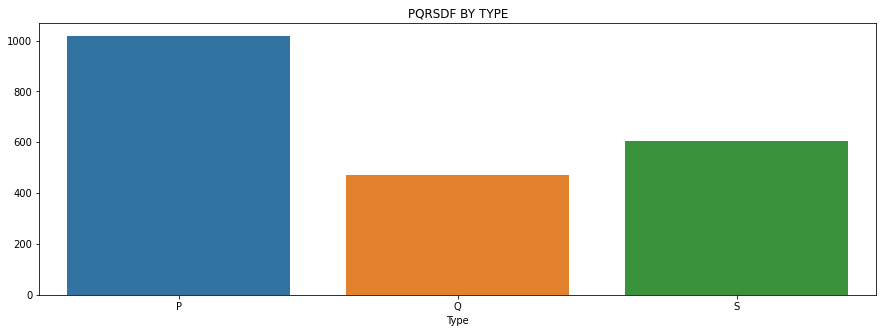

In [12]:
# Distribution of PQRSDF, adding the predicted ones
pqr = df_cop.groupby(['TIPO DE PQRSDF']).size()
plt.figure(figsize=(15, 5))
sns.barplot(x=pqr.index, y=pqr.values)
plt.title('PQRSDF BY TYPE')
plt.xlabel('Type')
pqr

In [13]:
#Predictor tool
pqrs=[]
num=int(input('Ingrese cuantas PQRS quiere ingresar'))
for i in range(num):
    inp=input('Ingrese su PQRS')
    pqrs.append(inp)

pqrs = pd.DataFrame(pqrs, columns=['TEXTO PQRSDF'])

#Transform text into vectors
data=bow_counts.transform(pqrs['TEXTO PQRSDF'])

#Predicting the output
prob= lr_cv.predict_proba(data) 
pred = lr_cv.predict(data)

#Assign the data to the missing
pqrs['TIPO DE PQRSDF'] = pred

pqrs

,TEXTO PQRSDF,TIPO DE PQRSDF
0,Manifiesto mi inconformidad porque no me han e...,Q


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=746f9757-a4f8-490f-a84c-875a1acb7471' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>